Safe water unsupervised machine learning

In [4]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

In [5]:
wa=pd.read_csv(r'water.csv')

In [6]:
wa.shape

(7999, 21)

In [7]:
wa.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [8]:
wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [9]:
wa[wa['ammonia']=='#NUM!'][['ammonia','is_safe']]


,ammonia,is_safe
7551,#NUM!,#NUM!
7568,#NUM!,#NUM!
7890,#NUM!,#NUM!


In [10]:
# delete 3 data contain '#NUM!'
#change festures'type to numberic
wa=wa[wa['ammonia']!='#NUM!']
wa['ammonia']=wa['ammonia'].astype(np.float64)
wa['is_safe']=wa['is_safe'].astype(int)
print('dataset has %s valid data, "ammonia" columns has change type as %s, "is_safe" columns has change type as %s'
      %(wa['ammonia'].shape[0],wa['ammonia'].dtypes,wa['is_safe'].dtypes ))

dataset has 7996 valid data, "ammonia" columns has change type as float64, "is_safe" columns has change type as int32


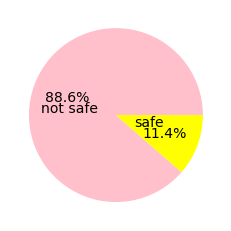

In [11]:
#0-not safe
#1-safe
label=['not safe','safe']
color=['pink','yellow']
number=[7084,912]
plt.pie(number, colors=color,labels=label,autopct='%0.1f%%',labeldistance=0.22, textprops={'fontsize': 14})
plt.show()

In [12]:
wa.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [13]:
# 10 data has negative 'ammonia' value
wa[wa['ammonia']<0]['ammonia']


1503   -0.01
1552   -0.07
1569   -0.03
1698   -0.08
1891   -0.01
3503   -0.01
3552   -0.07
3569   -0.03
3698   -0.08
3891   -0.01
Name: ammonia, dtype: float64

In [14]:
# change negative 'ammonia' value to positive value, might need to reduce those features
wa['ammonia']=wa['ammonia'].abs()
wa[wa['ammonia']<0]['ammonia']

Series([], Name: ammonia, dtype: float64)

In [15]:
#aluminium,arsenic, (perchlorate) might have some weighted outlier data
wa.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278312,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878769,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [16]:
#find mean value above 75% features
#aluminium,arsenic, (perchlorate) might have some weighted outlier data
over=[]
for i in list(wa.iloc[:,:-1].columns):
    if wa[i].mean()>np.percentile(wa[i], 75):
        over.append(i)
print(over, 'featuers many overweighted outlier data')

['aluminium', 'arsenic'] featuers many overweighted outlier data


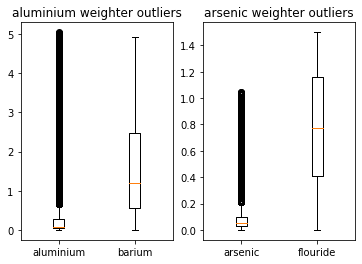

In [17]:
#visualision:use boxplot to show columns have heavt outlier
fig, [ax0, ax1] = plt.subplots(1,2)
ax0.boxplot(wa[['aluminium','barium']], labels=['aluminium','barium'])
ax0.set_title('aluminium weighter outliers')
ax1.boxplot(wa[['arsenic','flouride']], labels=['arsenic','flouride'])
ax1.set_title('arsenic weighter outliers')
plt.show()

In [18]:
#percentile
np.percentile(wa['arsenic'], 95),np.percentile(wa['aluminium'], 95)

(0.81, 3.9225)

<AxesSubplot:>

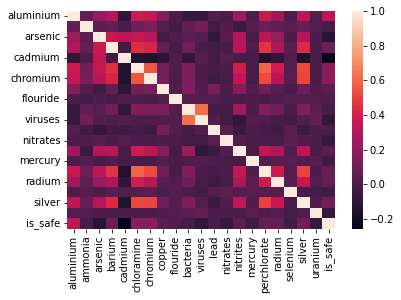

In [19]:
#draw feature correlation map, features are not correlated 
sns.heatmap(wa.corr())

In [20]:
wa.shape

(7996, 21)

In [21]:
#set X and y; train, val, test set
X=wa.iloc[:,:-1]
y=wa['is_safe']
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
X = stand.fit_transform(X)

#train, val, test set: 60%, 20%, 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=20)

In [22]:
#K-Means default
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
ktrain_pred=kmeans.predict(X_train)
kval_pred=kmeans.predict(X_val)
accuracy_score(y_train, ktrain_pred),accuracy_score(y_val, kval_pred)

(0.5918282259745674, 0.5834896810506567)

In [23]:
list(kval_pred).count(0), list(kval_pred).count(1)

(819, 780)

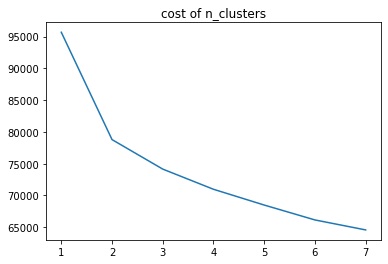

In [24]:
#elbow method find optimal n_cluster:Kmeans best result is 2 clusters,the accuracy is 59%, not ideal
inert=[]
for i in range(1,8):
    model=KMeans(n_clusters=i, random_state=0).fit(X_train)
    inert.append(model.inertia_)
    
plt.plot(range(1,8),inert)
plt.title('cost of n_clusters')
plt.show()

In [25]:
#DBSCAN has better accuracy result on eps=4,min_sample=2, but 1 cluster sample is too overweighted
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4, min_samples=2).fit(X)
db_pred=dbscan.labels_

print(set(db_pred),accuracy_score(y, db_pred))
n_noise_ = list(db_pred).count(-1)
print('noise:',n_noise_)
print(list(db_pred).count(0),list(db_pred).count(1))

{0, 1, -1} 0.8843171585792896
noise: 13
7981 2


In [26]:
db_ed=[0]
n_cluster=[0]
noise=[0]
accuracy=[0]
group1=[0]
group2=[0]
for i in range(1,10):
    db = DBSCAN(eps=i, min_samples=5).fit(X)
    db_ed.append(db.labels_)
    n_cluster.append(len(set(db_ed[i]))-(1 if -1 in db_ed[i] else 0))
    accuracy.append(accuracy_score(y, db_ed[i]))
    noise.append(list(db_ed[i]).count(-1))
    group1.append(list(db_ed[i]).count(0))
    group2.append(list(db_ed[i]).count(1))   

In [27]:
#show result
dict={'eps':range(10),
      'cluster':n_cluster,
     'group1':group1,
     'group2':group2,
     'noise':noise,
     'accuracy':accuracy}
dict=pd.DataFrame(dict)
dict

,eps,cluster,group1,group2,noise,accuracy
0,0,0,0,0,0,0.000000
1,1,0,0,0,7996,0.000000
2,2,53,880,6,6718,0.101551
3,3,23,5584,3,2310,0.631816
4,4,1,7977,0,19,0.883942
5,5,1,7996,0,0,0.885943
6,6,1,7996,0,0,0.885943
7,7,1,7996,0,0,0.885943
8,8,1,7996,0,0,0.885943
9,9,1,7996,0,0,0.885943


In [28]:
#np.where(a == i)[0]
#find better model eps[3,4]
db_ed=[]
n_cluster=[]
noise=[]
accuracy=[]
group1=[]
group2=[]
a=np.linspace(3, 4, num=10)
for i in a:
    db = DBSCAN(eps=i, min_samples=5).fit(X)
    db_ed.append(db.labels_)
    b=np.where(np.linspace(3, 4, num=10) == i)[0][0]
    n_cluster.append(len(set(db_ed[b]))-(1 if -1 in db_ed[b] else 0))
    accuracy.append(accuracy_score(y, db_ed[b]))
    noise.append(list(db_ed[b]).count(-1))
    group1.append(list(db_ed[b]).count(0))
    group2.append(list(db_ed[b]).count(1))  
    
    

In [29]:
#show result eps[3,4], DBCSAN doesn't give good result for all features'model
dict={'eps':np.linspace(3, 4, num=10),
      'cluster':n_cluster,
     'group1':group1,
     'group2':group2,
     'noise':noise,
     'accuracy':accuracy}
dict=pd.DataFrame(dict)
dict

,eps,cluster,group1,group2,noise,accuracy
0,3.000000,23,5584,3,2310,0.631816
1,3.111111,22,6139,8,1768,0.685093
2,3.222222,17,6650,3,1252,0.735993
3,3.333333,7,7095,5,877,0.784892
4,3.444444,2,7460,3,533,0.825163
5,3.555556,1,7652,0,344,0.846423
6,3.666667,2,7812,2,182,0.865183
7,3.777778,1,7903,0,93,0.875438
8,3.888889,1,7958,0,38,0.881566
9,4.000000,1,7977,0,19,0.883942


In [30]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [31]:
#starting feature reduction from 20 features
from sklearn.feature_selection import RFE
select=RFE(estimator=LogisticRegression(max_iter=100000,random_state=42), n_features_to_select=3, step=1)
select.fit(X_train,y_train)
print(select.ranking_)

#'aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium',
#'chloramine','chromium', 'copper', 'flouride', 'bacteria',
#'viruses', 'lead', 'nitrates', 'nitrites', 'mercury',
#'perchlorate', 'radium', 'selenium', 'silver', 'uranium',


[ 1 10  1 13  1  3  7  8 18  9  6 16  5 15 17  4 14 12 11  2]


In [32]:
# rearrange data feature by the  less importance to most importance
nwa=pd.DataFrame(wa[['flouride', 'mercury', 'lead','nitrites','radium','barium','selenium','silver', 'ammonia','bacteria','copper', 
                     'chromium','viruses','nitrates','perchlorate', 'chloramine', 'uranium','cadmium','arsenic','aluminium','is_safe']])
    


In [33]:
nwa.shape

(7996, 21)

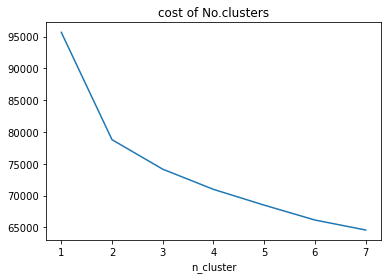

In [34]:
#select first 5,10,15,20 important features. elbow method shows that the optial cluster are 2 or 3

X1=nwa.iloc[:,:20]##2 features shows the best accuracy result
y=nwa['is_safe']
stand = StandardScaler()
X1 = stand.fit_transform(X1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=20)
X1_train, X1_val, y_train, y_val = train_test_split(X1_train, y_train, test_size=0.25, random_state=20)

inert=[]
for i in range(1,8):
    model=KMeans(n_clusters=i, random_state=0).fit(X1_train)
    inert.append(model.inertia_)
    
plt.plot(range(1,8),inert)
plt.title('cost of No.clusters')
plt.xlabel('n_cluster')
plt.show()

In [35]:
#test 3 clusters model, but 3 clusters model result is not good as 2 clusters result
ktrain_pred={}
train_accuracy=[]
val_accuracy=[]
group11=[]
group21=[]
group31=[]
for i in range(20):
    X101=nwa.iloc[:,i:20]##2 features shows the best accuracy result
    y=nwa['is_safe']
    stand = StandardScaler()
    X101 = stand.fit_transform(X101)
    X101_train, X101_test, y_train, y_test = train_test_split(X101, y, test_size=0.2, random_state=20)
    X101_train, X101_val, y_train, y_val = train_test_split(X101_train, y_train, test_size=0.25, random_state=20)
    
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X101_train)
    ktrain_pred=kmeans.predict(X101_train)#list
    kval_pred=kmeans.predict(X101_val)#list
    train_accuracy.append(accuracy_score(y_train, ktrain_pred))
    val_accuracy.append(accuracy_score(y_val, kval_pred))
    group11.append(list(kval_pred).count(0))
    group21.append(list(kval_pred).count(1))
    group31.append(list(kval_pred).count(2))
    
    
f=np.linspace(20,20,20)-range(20)
dict2={'n_features':f,
      'train_accuracy':train_accuracy,
      'val_accuracy':val_accuracy,
      'n_group1':group11,
      'n_group2':group21,
      'n_group3':group31}
dict2=pd.DataFrame(dict2)
dict2   


,n_features,train_accuracy,val_accuracy,n_group1,n_group2,n_group3
0,20.0,0.217844,0.214509,329,804,466
1,19.0,0.218053,0.215760,331,804,464
2,18.0,0.205545,0.226391,464,804,331
3,17.0,0.214301,0.211382,324,804,471
4,16.0,0.212633,0.210757,321,806,472
5,15.0,0.212216,0.229518,468,815,316
6,14.0,0.208881,0.204503,314,821,464
7,13.0,0.509277,0.505316,821,312,466
8,12.0,0.206379,0.226391,459,831,309
9,11.0,0.276631,0.263290,306,456,837


In [36]:
#test 2 clusters model
ktrain_pred={}
train_accuracy=[]
val_accuracy=[]
group11=[]
group21=[]
for i in range(20):
    X101=nwa.iloc[:,i:20]##2 features shows the best accuracy result
    y=nwa['is_safe']
    stand = StandardScaler()
    X101 = stand.fit_transform(X101)
    X101_train, X101_test, y_train, y_test = train_test_split(X101, y, test_size=0.2, random_state=20)
    X101_train, X101_val, y_train, y_val = train_test_split(X101_train, y_train, test_size=0.25, random_state=20)
    
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X101_train)
    ktrain_pred=kmeans.predict(X101_train)#list
    kval_pred=kmeans.predict(X101_val)#list
    train_accuracy.append(accuracy_score(y_train, ktrain_pred))
    val_accuracy.append(accuracy_score(y_val, kval_pred))
    group11.append(list(kval_pred).count(0))
    group21.append(list(kval_pred).count(1))
    
f=np.linspace(20,20,20)-range(20)
dict1={'n_features':f,
      'train_accuracy':train_accuracy,
      'val_accuracy':val_accuracy,
      'n_group1':group11,
      'n_group2':group21}
dict1=pd.DataFrame(dict1)
dict1   


,n_features,train_accuracy,val_accuracy,n_group1,n_group2
0,20.0,0.591828,0.583490,819,780
1,19.0,0.591620,0.583490,819,780
2,18.0,0.408380,0.416510,780,819
3,17.0,0.592037,0.583490,819,780
4,16.0,0.591411,0.583490,823,776
5,15.0,0.594955,0.587867,826,773
6,14.0,0.596414,0.592245,837,762
7,13.0,0.596206,0.592245,837,762
8,12.0,0.610798,0.602877,856,743
9,11.0,0.389619,0.397749,740,859


In [41]:
#first 5 important features 'aluminium','cadmium','arsenic','uranium','chloramine'
##'aluminium','cadmium' 2 features shows the best accuracy result, it is presented on class
#however, 2-feature-model isn't good to show the PCA,therefore, here choose 5 features model in the next step
X1=nwa[['aluminium','cadmium','arsenic','uranium','chloramine']]
y=nwa['is_safe']
stand = StandardScaler()
X1 = stand.fit_transform(X1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=20)
X1_train, X1_val, y_train, y_val = train_test_split(X1_train, y_train, test_size=0.25, random_state=20)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X1_train)
kmeans_pred=kmeans.predict(X1_train)
val_ed=kmeans.predict(X1_val)
all_pred=kmeans.predict(X1)
print('5 features model,\n train set accuracy %s,\n validation set accuracy %s,\n data point group 1 contains%s, group 2 contains%s' 
      %(accuracy_score(y_train, kmeans_pred),accuracy_score(y_val, val_ed), list(val_ed).count(0), list(val_ed).count(1)))

5 features model,
 train set accuracy 0.6679174484052532,
 validation set accuracy 0.6797998749218261,
 data point group 1 contains1023, group 2 contains576


In [44]:
#first 2 components explained total 58% data
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_principal = pca.fit(X1)

X_principal.columns = ['P1', 'P2']
print('first 2 components explained ratio',pca.explained_variance_ratio_)
newdata=pca.transform(X1)
newdata=pd.DataFrame(newdata, columns= ['P1', 'P2'])
newdata['is_safe']=nwa['is_safe']
newdata['aluminium']=nwa['aluminium']
newdata['cadmium']=nwa['cadmium']
newdata['arsenic']=nwa['arsenic']
newdata['uranium']=nwa['uranium']
newdata['chloramine']=nwa['chloramine']


first 2 components explained ratio [0.32823276 0.25253487]


PCA first 2 components visulization camparision between real data and unsupervised prediction

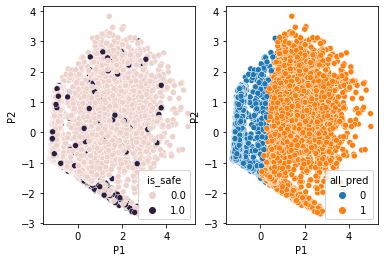

In [45]:
#P1 and P2 explained all datapoint because only 2 features were selected in the model
newdata['all_pred']=all_pred
fig, axes = plt.subplots(1,2)
sns.scatterplot(x="P1", y="P2", hue="is_safe", data=newdata,ax=axes[0])
sns.scatterplot(x="P1", y="P2", hue="all_pred", data=newdata,ax=axes[1])
plt.show()

# task 3 evaluate unsupervised model (KMean,2 clusters)

In [51]:
#create a new dataset: data+unsupervised prediction
    
data=pd.DataFrame(wa[['aluminium','cadmium','arsenic','uranium','chloramine','is_safe']], columns=['aluminium','cadmium','arsenic','uranium','chloramine','is_safe'])
X=data[['aluminium','cadmium','arsenic','uranium','chloramine']]
y=data['is_safe']
stand = StandardScaler()
X = stand.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=20)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
pred=kmeans.predict(X)
data['unsuper_pred']=pred
data

,aluminium,cadmium,arsenic,uranium,chloramine,is_safe,unsuper_pred
0,1.65,0.007,0.04,0.02,0.35,1,0
1,2.32,0.002,0.01,0.05,5.28,1,1
2,1.01,0.008,0.04,0.01,4.24,0,1
3,1.36,0.001,0.04,0.05,7.23,1,1
4,0.92,0.006,0.03,0.02,2.67,1,0
...,...,...,...,...,...,...,...
7994,0.05,0.040,0.00,0.03,0.10,1,0
7995,0.05,0.010,0.02,0.08,0.45,1,0
7996,0.09,0.030,0.00,0.05,0.05,1,0
7997,0.01,0.000,0.01,0.00,2.00,1,0


In [53]:
data.corr()

,aluminium,cadmium,arsenic,uranium,chloramine,is_safe,unsuper_pred
aluminium,1.000000,-0.099902,0.225725,0.014723,0.369221,0.333974,0.576540
cadmium,-0.099902,1.000000,0.334782,-0.005911,-0.144366,-0.256034,-0.025947
arsenic,0.225725,0.334782,1.000000,0.001469,0.356509,-0.123362,0.557773
uranium,0.014723,-0.005911,0.001469,1.000000,-0.007648,-0.075619,0.001885
chloramine,0.369221,-0.144366,0.356509,-0.007648,1.000000,0.186704,0.798474
is_safe,0.333974,-0.256034,-0.123362,-0.075619,0.186704,1.000000,0.215301
unsuper_pred,0.576540,-0.025947,0.557773,0.001885,0.798474,0.215301,1.000000


#feature--unsupervised data model

In [55]:
# LogisticRegression on 5-features-unsupervised model, accuracy is high: 2 clusters separate group clearly.
X5=data[['aluminium','cadmium','arsenic','uranium','chloramine']]
y=data['unsuper_pred']
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=20)
lor=LogisticRegression(random_state=0, max_iter=10000)
lor.fit(X5_train, y_train)
lorunsup_pred=lor.predict(X5)

print('LogisticRegression train features_unsupervised data accuracy',accuracy_score(y_test,lor.predict(X5_test)))
print('')
print('classification_report')
#feature_unspervised result in LogisticRegression model
from sklearn.metrics import classification_report
print(classification_report(y_test, lor.predict(X5_test)))

LogisticRegression train features_unsupervised data accuracy 0.993125

classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       990
           1       0.99      1.00      0.99       610

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [56]:
lor.coef_

array([[ 3.16737174,  1.06009767, 13.59111994,  0.30075656,  2.17884938]])

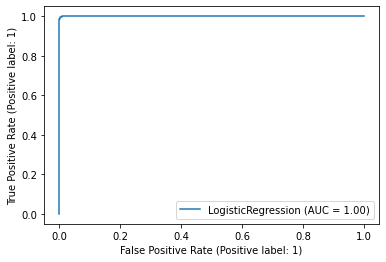

In [57]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lor, X5_test, y_test)

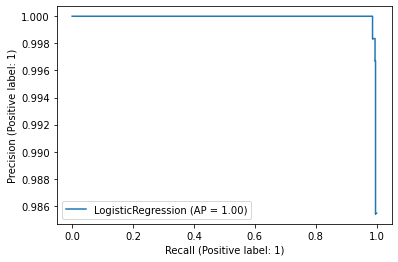

In [58]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(lor, X5_test, y_test)

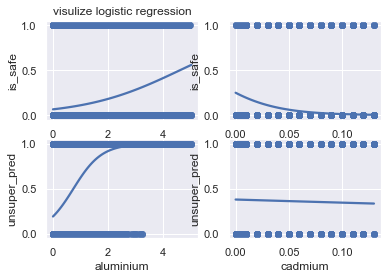

In [66]:
#visilised that how unsupervised model train data by adjusting the features' probability to be clusters
#first row is original data, second row is unsuerpvised data
sns.set()
fig, axes = plt.subplots(2, 2)
sns.regplot(x=data['aluminium'], y=data['is_safe'], data=data, logistic=True, ci=None, ax=axes[0,0]).set(title='visulize logistic regression')
sns.regplot(x=data['cadmium'], y=data['is_safe'], data=data, logistic=True, ci=None, ax=axes[0,1])
sns.regplot(x=data['aluminium'], y=data['unsuper_pred'], data=data, logistic=True, ci=None, ax=axes[1,0])
sns.regplot(x=data['cadmium'], y=data['unsuper_pred'], data=data, logistic=True, ci=None, ax=axes[1,1])
plt.show()

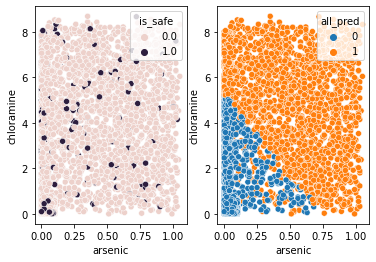

In [48]:
#visilised that how unsupervised model change data distribution, pick up 2 features among 5 features

fig, axes = plt.subplots(1,2)
sns.scatterplot(x="arsenic", y="chloramine", hue="is_safe", data=newdata,ax=axes[0])
sns.scatterplot(x="arsenic", y="chloramine", hue="all_pred", data=newdata,ax=axes[1])
plt.show()

In [69]:
#5 features' unsupervised model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(data['is_safe'],data['unsuper_pred'])

0.6689594797398699

In [70]:
# 5 features' unsupervised model not perform well to predict class 1, only 20% chance to predict right class 1
# 5 features' unsupervised model good to show how model train data,but not show better result comparing with 2fetures unsupervised model
print(classification_report(data['is_safe'],data['unsuper_pred']))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      7084
           1       0.20      0.66      0.31       912

    accuracy                           0.67      7996
   macro avg       0.57      0.66      0.55      7996
weighted avg       0.85      0.67      0.73      7996



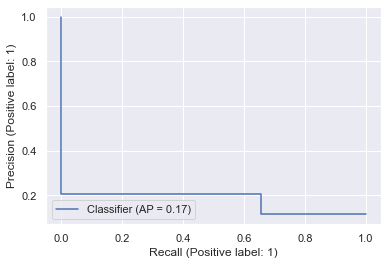

In [72]:
#5 features' unsupervised model precision-recall curve
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(data['is_safe'],data['unsuper_pred'])

In [76]:
# 2features('cadmium','aluminium') unsupervised model
X1=data[['cadmium','aluminium']]
y=data['is_safe']
stand = StandardScaler()
X1 = stand.fit_transform(X1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=20)
X1_train, X1_val, y_train, y_val = train_test_split(X1_train, y_train, test_size=0.25, random_state=20)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X1_train)
kmeans_pred=kmeans.predict(X1_train)
val_ed=kmeans.predict(X1_val)
all_pred=kmeans.predict(X1)
data['2feature_pred']=all_pred
print('2 features(aluminium,cadmium_ safe water)model,\n train set accuracy %s,\n validation set accuracy %s,\n data point group 1 contains%s, group 2 contains%s' 
      %(accuracy_score(y_train, kmeans_pred),accuracy_score(y_val, val_ed), list(val_ed).count(0), list(val_ed).count(1)))

2 features(aluminium,cadmium_ safe water)model,
 train set accuracy 0.8355222013758599,
 validation set accuracy 0.8430268918073797,
 data point group 1 contains1356, group 2 contains243


In [75]:
#2 features' unsupervised model accuracy
accuracy_score(data['is_safe'],data['2feature_pred'])

0.8351675837918959

In [77]:
print(classification_report(data['is_safe'],data['2feature_pred']))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7084
           1       0.34      0.49      0.40       912

    accuracy                           0.84      7996
   macro avg       0.64      0.69      0.65      7996
weighted avg       0.86      0.84      0.85      7996



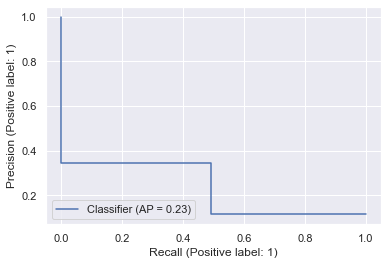

In [78]:
# 2 features' unsupervised model precision-recall curve
PrecisionRecallDisplay.from_predictions(data['is_safe'],data['2feature_pred'])

#conclusion:
"""
when choose all featuers at start, unsurpervised model K_means and DBSCAN work not well. K_means has better result 
when reduce featue in K_means model, accuracy is getting higer:
    final model is 2 clusters('aluminium, cadmium-safe water'), validation set accuracy 0.8430268918073797
when PCA imply in the 2 clusters('aluminium, cadmium-safe water') model, 2 new component explained 99.99% data

use unsupervised 5 cluster model ('aluminium','cadmium','arsenic','uranium','chloramine''aluminium, cadmium') predict datapoint, the accuracy is 0.6689594797398699, however, precision and recall for class 1 is not ideal, only 20% chance to predict right class 1. low precision-recall curve(0.17) show that 5 featuers is not suitable to predict imbalance origianl dataset 
 
use unsupervised 2 cluster model ('aluminium, cadmium') predict datapoint, the accuracy is 0.8351675837918959
2 featues' unsupervised model classfication report result is better than 5 feautres' unsupervised model,  better precision-recall curve(0.23)

therefore, optimal method is w features' unsupervised model
water with high aluminium and low cadmium has higher posibility being safe  

further reseach: aluminium has more heavy weight outliers, result might be improved when only choose 95% aluminium data
"""

data source:
https://www.kaggle.com/datasets/mssmartypants/water-quality